In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

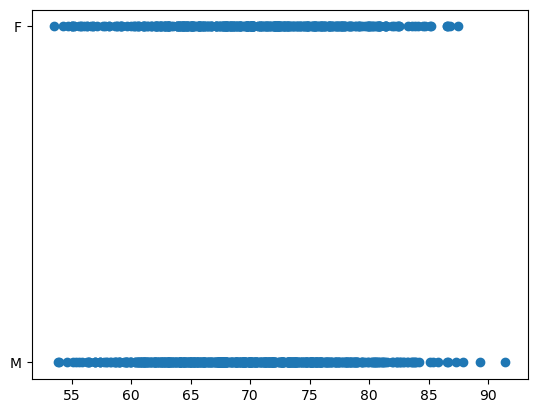

In [90]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
plt.plot(y_train,x_train[:,1], 'o')
# Found that it is more or less independent of gender, but not removing the feature

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

# Converting the internet and sex columns to numbers

def feature_changing(x_train):
  # ---------
  unique_internet, indices = np.unique(x_train[:, 0], return_inverse=True)
  x_train[:, 0] = indices

  unique_sex, indices = np.unique(x_train[:, 1], return_inverse=True)
  x_train[:, 1] = indices

  x_train.astype(float)
  # ---------
  return x_train

x_train = feature_changing(x_train)

In [83]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
  # ---------
    return x_train,x_std,x_mean

In [84]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
    loss = np.sum((y_train - np.dot(x_train,w) - b)**2)/(2*x_train.shape[0])
  # ---------
    return loss

In [87]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
    # Update w and b
    alpha = 0.01
    dw = -np.dot(x_train.T,(y_train - np.dot(x_train,w) - b))/x_train.shape[0]
    db = -np.sum(y_train - np.dot(x_train,w) - b)/x_train.shape[0]
    w = w - alpha*dw
    b = b - alpha*db
  # ---------

    return w,b

In [91]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
